
# AllLife Credit Card Customer Segmentation

Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

#### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

#### Attribute Information
- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

### Importing necessary libraries

In [2]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
## Read data from excel file
data = pd.read_excel("CreditCardCustomerData.xlsx")

In [4]:
## there are 660 rows and 7 columns
data.shape

(660, 7)

## Exploratory Data Analysis
- Get descriptive statistics
- Comment on the types of variables in dataset and descriptive statistics observation
- Check unique values in Customer Key columns
- Drop for Duplicates in Customer key
- Droping Unnecessary columns which does not add value to clustering
- Check missing values in the dataframe and impute those missing values
- Univariate and Bivariate visualization: Looking at one feature at a time to understand how are the values are distributed.
- checking outliers using Box plot
- checking for skweness in data
- Presence of outlier will change to scaling algorithm( i will prefer RobustScaler over standard scalar in presence of outliers)



In [5]:
## Have a look at data 
data

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2                    1                    3                 4  
3                    1                    1                 4  
4                    0                   12                 3  
..                 ...                  ...               ...  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2  

[660 rows x 7 columns]

In [6]:
##All columns are integers nd there is no columns with null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
data.describe()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%             1.000000             1.000000          1.000000  
50%             2.000000             2.000000          3.000000  
75%             4.000000             4.000000          5.000000  
max             5.000000            15.000000         10.000000

In [8]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [9]:
## No Null values 
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
## there is 655 unique customer key
data['Customer Key'].nunique()

655

In [11]:
len(data)

660

### Drop duplicate customer key kepping the last occurance

In [12]:
df = data.sort_values('Customer Key').drop_duplicates(['Customer Key'], keep='last')

In [13]:
len(df)

655

In [14]:
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)
df.profile_report()

In [15]:
##Droping Sl_No and Customer Key as it will not add value for clustering
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

In [16]:
df.skew()

Avg_Credit_Limit       2.196609
Total_Credit_Cards     0.146110
Total_visits_bank      0.142998
Total_visits_online    2.215321
Total_calls_made       0.659476
dtype: float64

Avg_Credit_Limit and Total_visits_online is highly skewed

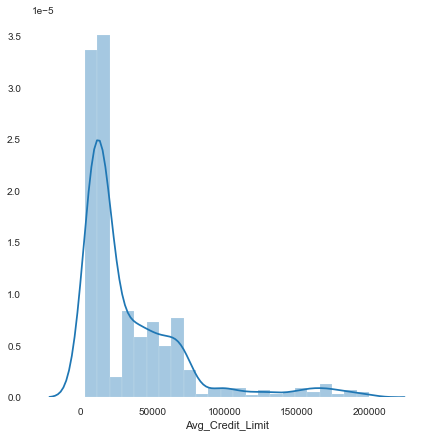

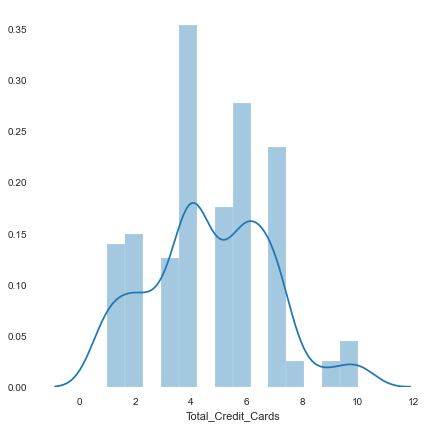

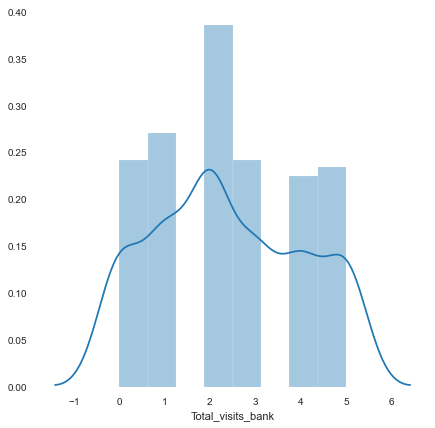

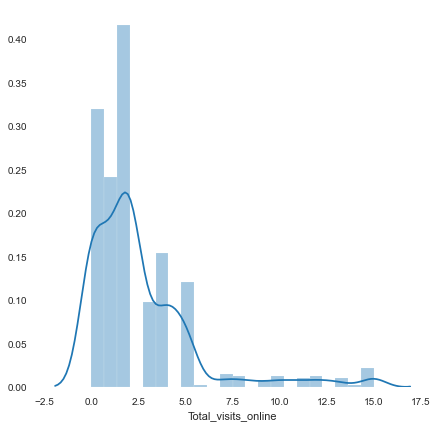

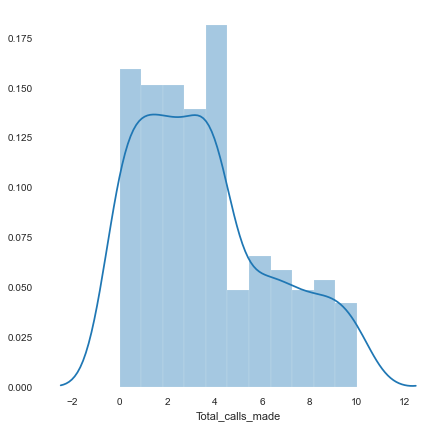

In [17]:
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in columns:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(df[col])

Same skewness is seen through distplot 
- Avg_Credit_Limit is right skewed
- Total_visits_online is skewed

Outlier Detetction through boxplot

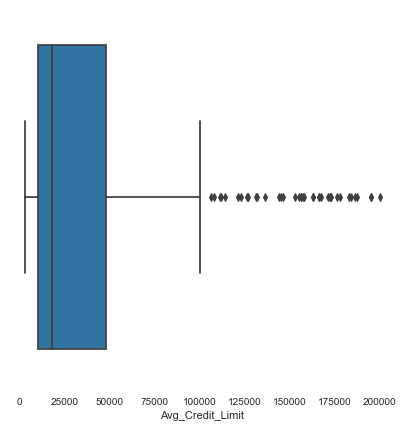

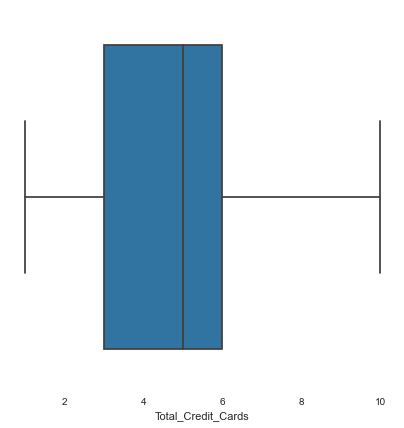

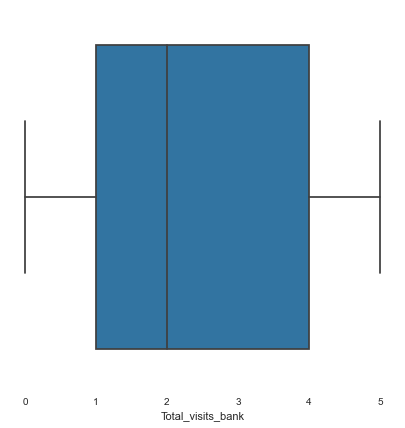

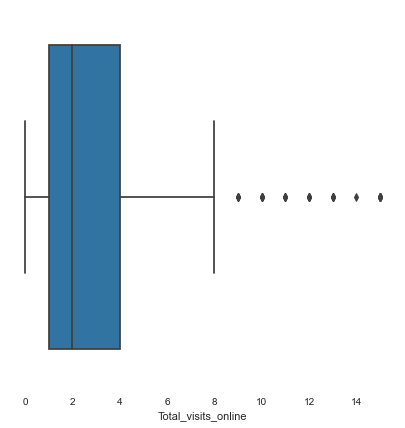

In [18]:
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in columns:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(df[col])

In [19]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

In [20]:
# Correlation matrix for all variables
correlation_matrix(df, threshold = 0.8)

Series([], dtype: float64)

Seems like
- Total_Credit_Cards and total_call_made has some kind of correlation.
- Total_credit_cards and avg_credit_limit has some kind of correlation.
- Total_visits_online and and avg_credit_limit has some kind of correlation.



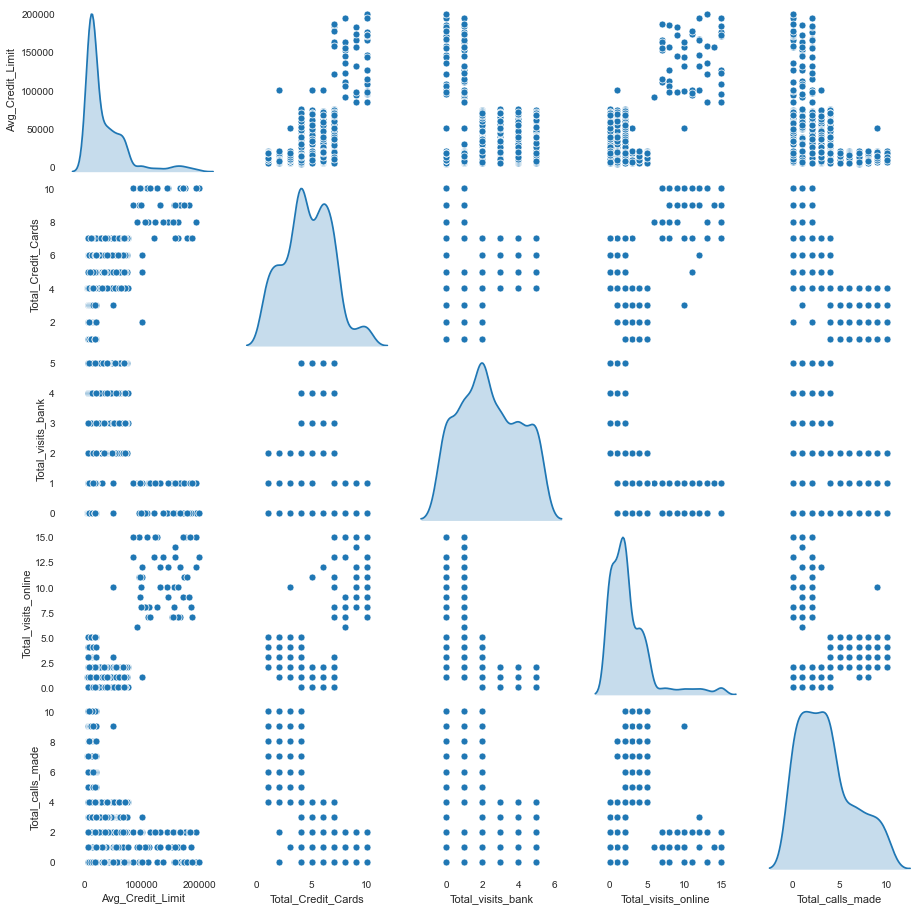

In [21]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')
plt.show()

### Scaling of data

In [22]:
from sklearn.preprocessing import RobustScaler

using robustscalar as there are outliers in the dataset 

In [23]:
scaler = RobustScaler() 
df_scaled = scaler.fit_transform(df)
df_scaled= pd.DataFrame(df_scaled,columns = df.columns)

In [24]:
df_scaled

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            0.868421            0.666667           0.333333   
1           -0.157895            0.333333           1.000000   
2            0.026316           -1.000000           0.000000   
3           -0.236842            0.666667           1.000000   
4            0.526316           -0.333333           0.333333   
..                ...                 ...                ...   
650          0.552632            0.333333           0.666667   
651          0.947368            0.000000           0.666667   
652          0.052632           -1.000000           0.000000   
653         -0.026316           -1.333333          -0.666667   
654          2.763158            1.000000          -0.333333   

     Total_visits_online  Total_calls_made  
0               0.000000             -0.75  
1               0.000000             -0.50  
2               0.333333              0.25  
3              -0.666667             -0.75  
4               0.000000             -0.75  
..                   ...               ...  
650            -0.666667              0.25  
651             0.000000             -0.50  
652             0.666667              1.25  
653             1.000000              0.50  
654             4.333333             -0.25  

[655 rows x 5 columns]

### Finding Optimum number of cluster using elbow method

In [25]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [26]:
plt.plot(range(1,11), wss, 'bx-')

plt.xlabel('k')
plt.ylabel('wss')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

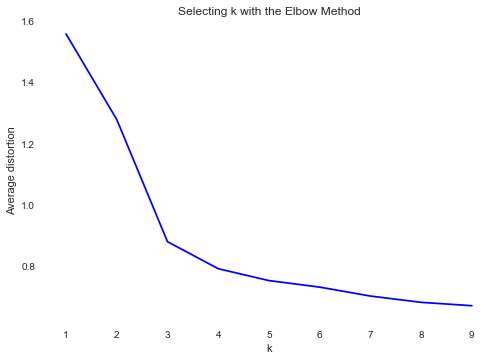

In [27]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [28]:

clusters=range(2,10)
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 15, random_state=2345)
    kmeans.fit(df_scaled)
    prediction=kmeans.predict(df_scaled)
    print(f'k={k}: {silhouette_score(df_scaled, prediction)}')

k=2: 0.6415789399239075
k=3: 0.5005670475487137
k=4: 0.37469389582066015
k=5: 0.28623113374113734
k=6: 0.26677707084867885
k=7: 0.2267938089877353
k=8: 0.2280193184390698
k=9: 0.21066695535511865


### KMean clustering for 2 clusters

In [29]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)
kmeans.fit(df_scaled)
prediction=kmeans.predict(df_scaled)
print(f'k=2: {silhouette_score(df_scaled, prediction)}')
labels = kmeans.labels_


k=2: 0.6415789399239075


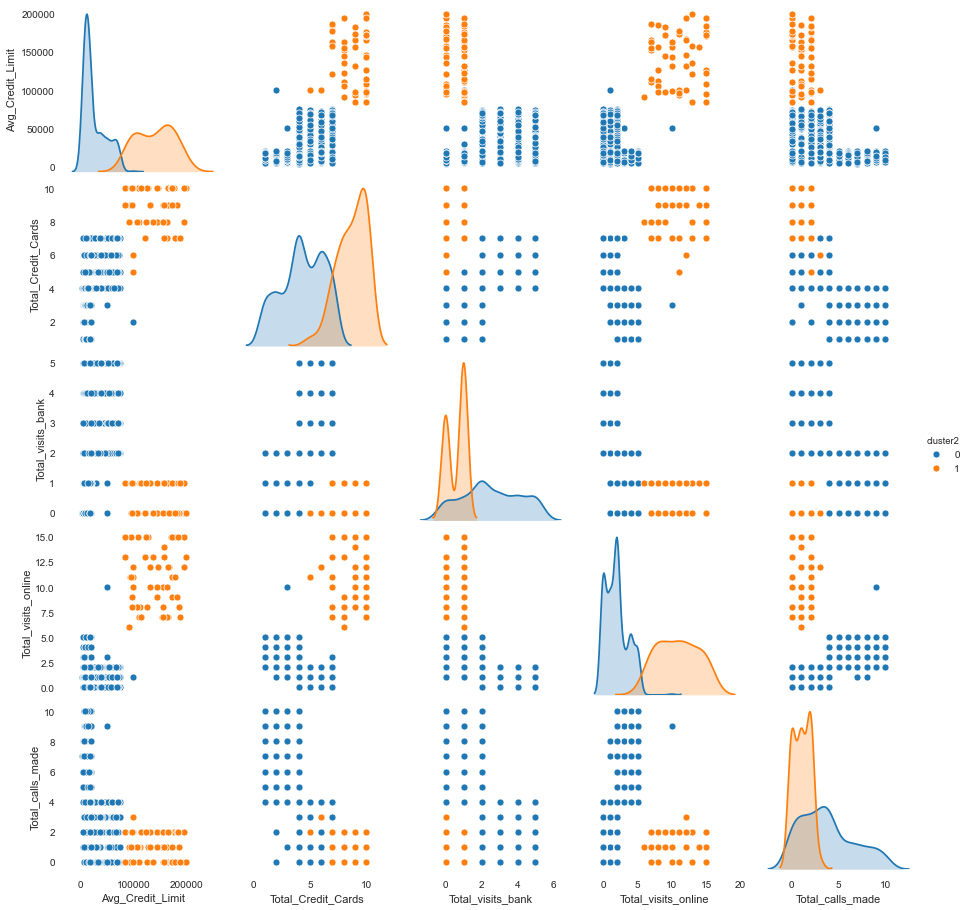

In [30]:
import seaborn as sns
df["cluster2"] = prediction
df_scaled["cluster2"] = prediction
cols = list(df.columns)


sns.pairplot( df[ cols ], hue="cluster2")

In [32]:
clust_profile=df.groupby('cluster2').quantile(.5)
clust_profile['freq2']=df.cluster2.value_counts().sort_index()
clust_profile

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
cluster2                                                            
0                  17000.0                 4.0                2.0   
1                 145500.0                 9.0                1.0   

          Total_visits_online  Total_calls_made  freq2  
cluster2                                                
0                         2.0               3.0    605  
1                        11.0               1.0     50

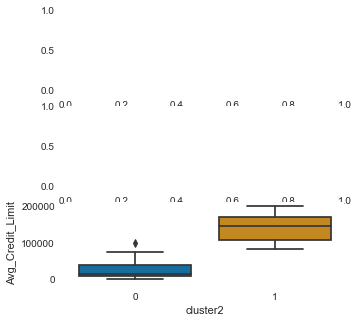

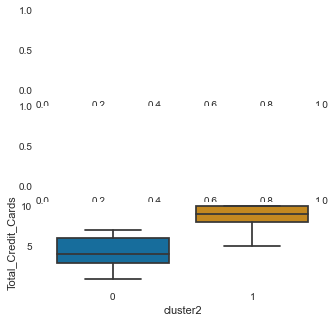

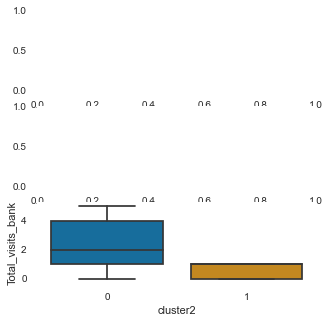

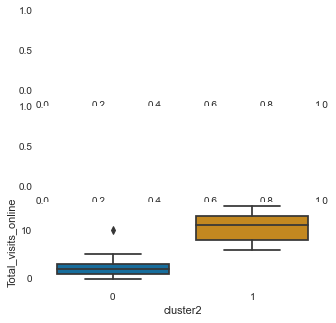

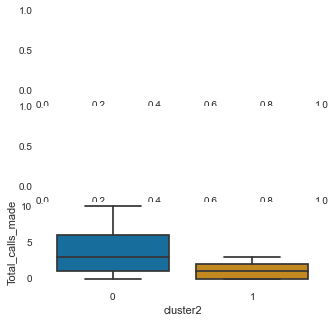

In [39]:
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in columns:
    f,(ax1) =plt.subplots(3, figsize=(5,5))
    sns.boxplot(y=df[col], x='cluster2', 
                 data=df, 
                 palette="colorblind")

Kmean Analysis with k =2
- silhouette_score = 0.6415789399239075
- Cluster 0 credit limit is low, no.credit cards are less ,they made more calls and visit bank.Might be thery are new to credit card process.
- Cluster 1 median credit limit is high and they have more no of cards but the go online as compare to coming to banks and calls.
- Might be they are well aware of online banking features 


In [40]:
df.drop(['cluster2'], axis=1, inplace=True)
df_scaled.drop(['cluster2'], axis=1, inplace=True)

k=4: 0.37469389582066015


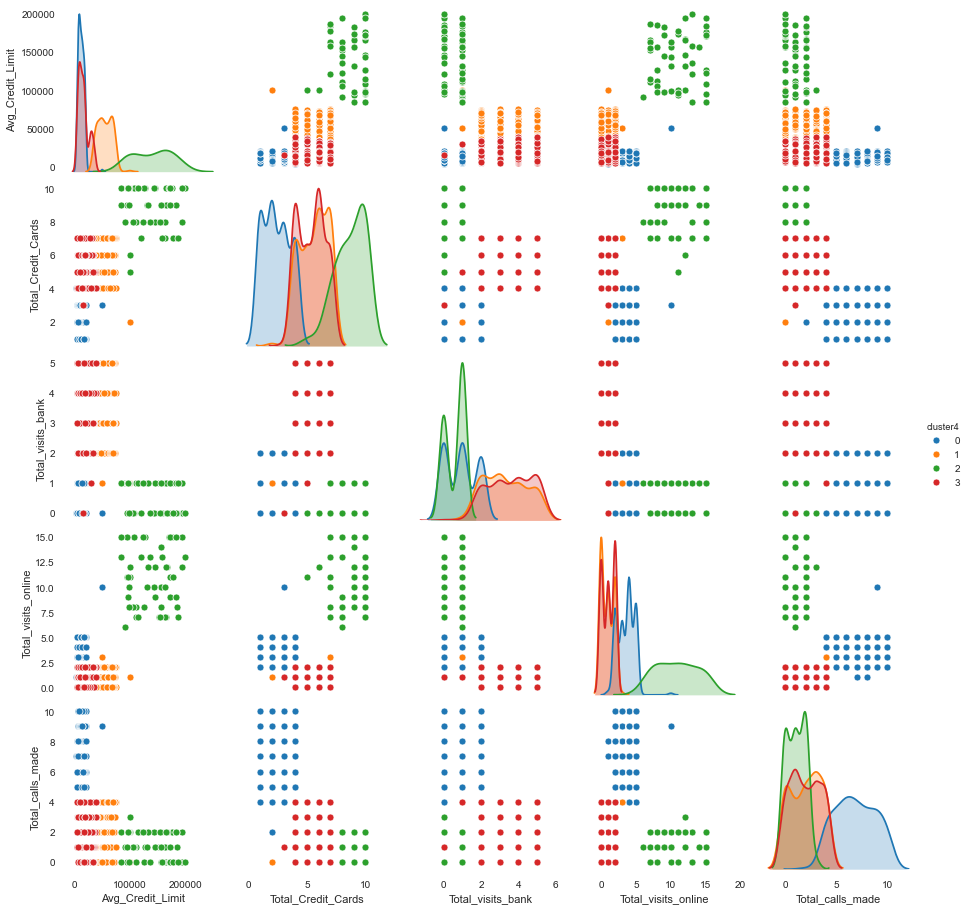

In [41]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2345)
kmeans.fit(df_scaled)
prediction=kmeans.predict(df_scaled)
print(f'k=4: {silhouette_score(df_scaled, prediction)}')
labels = kmeans.labels_
import seaborn as sns
df["cluster4"] = prediction
df_scaled["cluster4"] = prediction
cols = list(df.columns)


sns.pairplot( df[ cols ], hue="cluster4")

In [43]:
clust_profile4=df.groupby('cluster4').quantile(.5)
clust_profile4['freq4']=df.cluster4.value_counts().sort_index()
clust_profile4

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
cluster4                                                            
0                  12000.0                 2.0                1.0   
1                  56000.0                 6.0                3.0   
2                 145500.0                 9.0                1.0   
3                  14000.0                 6.0                4.0   

          Total_visits_online  Total_calls_made  freq4  
cluster4                                                
0                         4.0               7.0    220  
1                         1.0               2.0    171  
2                        11.0               1.0     50  
3                         1.0               2.0    214

In [44]:
df.drop(['cluster4'], axis=1, inplace=True)
df_scaled.drop(['cluster4'], axis=1, inplace=True)

k=3: 0.5005670475487137


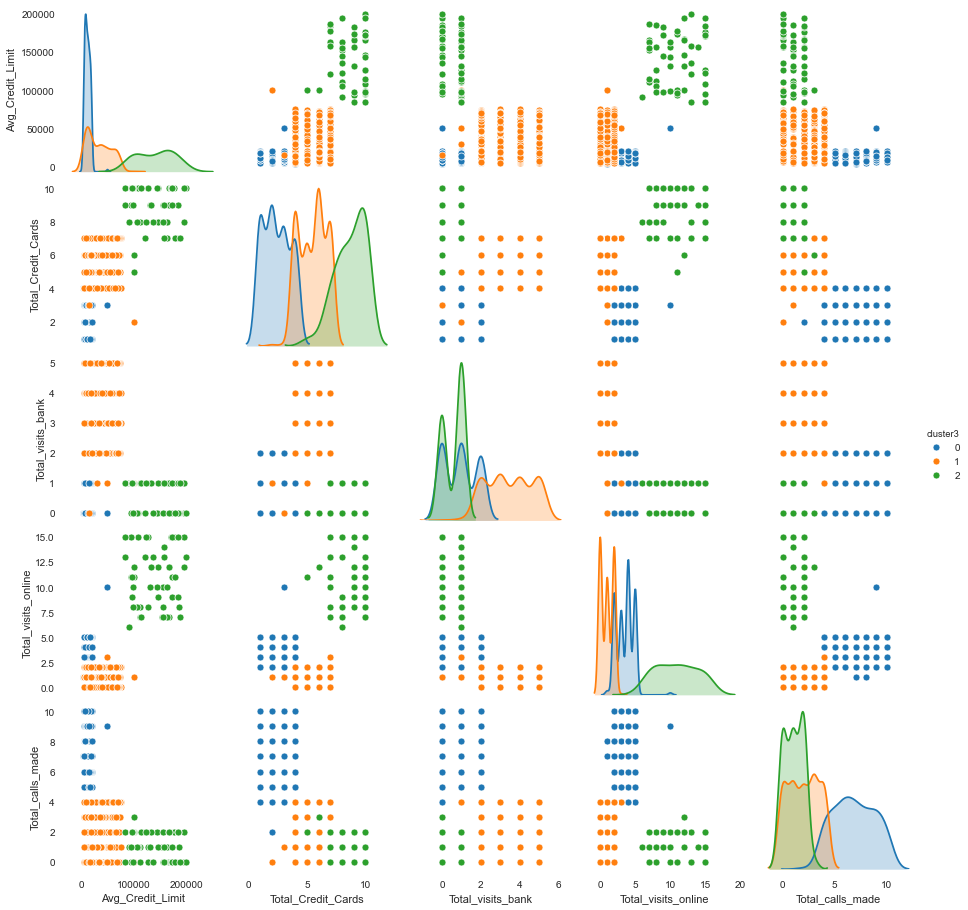

In [45]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(df_scaled)
prediction=kmeans.predict(df_scaled)
print(f'k=3: {silhouette_score(df_scaled, prediction)}')
labels = kmeans.labels_
import seaborn as sns
df["cluster3"] = prediction
df_scaled["cluster3"] = prediction
cols = list(df.columns)


sns.pairplot( df[ cols ], hue="cluster3")


In [46]:
clust_profile3=df.groupby('cluster3').quantile(.5)
clust_profile3['freq3']=df.cluster3.value_counts().sort_index()
clust_profile3

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
cluster3                                                            
0                  12000.0                 2.0                1.0   
1                  31000.0                 6.0                3.0   
2                 145500.0                 9.0                1.0   

          Total_visits_online  Total_calls_made  freq3  
cluster3                                                
0                         4.0               7.0    221  
1                         1.0               2.0    384  
2                        11.0               1.0     50

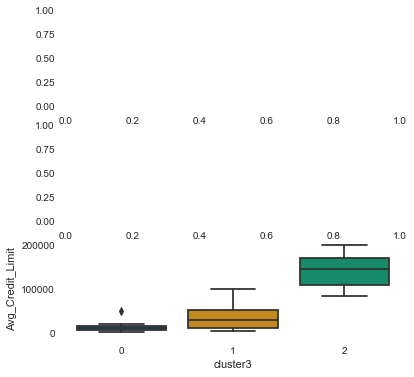

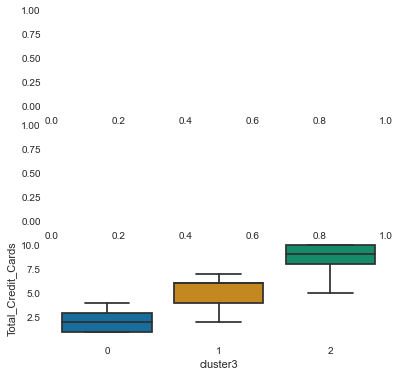

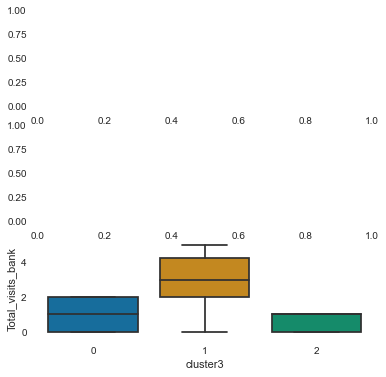

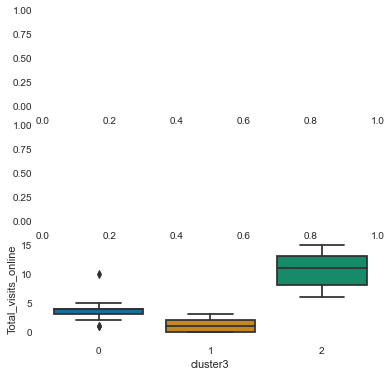

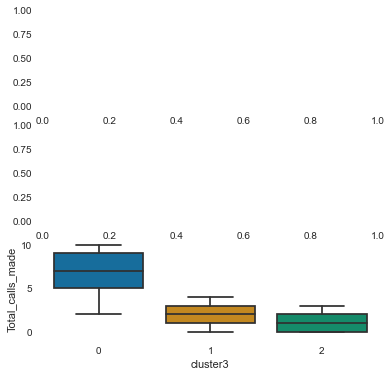

In [50]:
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in columns:
    f,(ax1) =plt.subplots(3, figsize=(6,6))
    sns.boxplot(y=df[col], x='cluster3', 
                 data=df, 
                 palette="colorblind")

## Boxplot Analysis

### Avg_credit_limit
- there is clear demarcation between cluter 1 and 2
- Median od cluster 2 is higher than median of cluster 0 and 1
### Total_Credit_Cards
- there is clear demarcation between cluter 1 and 2
- Median od cluster 2 is higher than median of cluster 0 and 1
### Total_visits_bank
- More customers cluster 1 prefer to to_visit_bank than cluster 0 and 2

### Total_visits_online
- Mostly customer of cluster 2 prefer online banking

### Total_calls_made
- Cluster 0 has more cal made as compare to cluster 1 and 2
- Mostly cluster mode of interaction with bank is mostly through call



Cluster 3 analysis
- silhouette_score = 0.5013898982440315
- Low --Cluster 0 avg_credit_limit is lowest,  they have less no.credit cards. calls are more as they can new and they might have more doubts.
- Moderate--Cluster 1 avg_credit_limit is ok, no.credit cards are moderate 
,they made more c.
- High--Cluster 2  avg_credit_limit is high and they have more no of cards but the go more online as compare to coming to banks and calls as they are used to online features they dont have to call or come to bank for the things which can be done online.


Looking at all cluster2 and 3 looks better.
in 2 cluster there is clear demarcation between the two cluster .
One with high avg_credit_limit and no of cards and one with low av_credit_limit and low number of cards.

Also one cluster always stands out in all the K mean models the one with highest av_credit_limit and no.of card.
There is a straight demarcation for these people as compare to others.

I will prefer 3 clusters which further segregate between low, moderate and high .


## Hierachical clustering

In [53]:
from sklearn.cluster import AgglomerativeClustering 

In [54]:
##For Cophenet , dendogram and linkage 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [55]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [56]:
df.drop(['cluster3'], axis=1, inplace=True)
df_scaled.drop(['cluster3'], axis=1, inplace=True)

In [57]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Za = linkage(df_scaled, metric='euclidean', method='average')
ca, coph_dists = cophenet(Za , pdist(df_scaled))

ca

0.9193934955572829

In [58]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Za, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Zc = linkage(df_scaled, metric='euclidean', method='complete')
cc, coph_dists = cophenet(Zc , pdist(df_scaled))

cc

0.8910946994544123

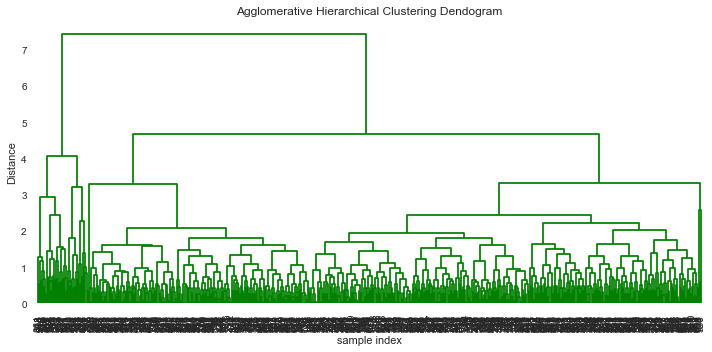

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Zc, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Zw = linkage(df_scaled, metric='euclidean', method='ward')
cw, coph_dists = cophenet(Zw , pdist(df_scaled))

cw

0.7899158657450128

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Zw, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [63]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Zcn = linkage(df_scaled, metric='euclidean', method='single')
ccn, coph_dists = cophenet(Zcn , pdist(df_scaled))

ccn

0.8295748990757713

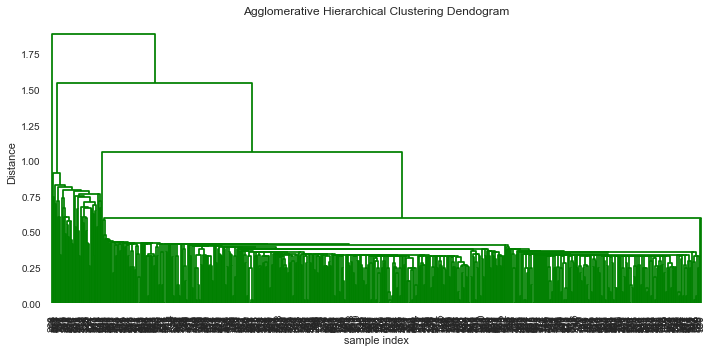

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Zcn, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

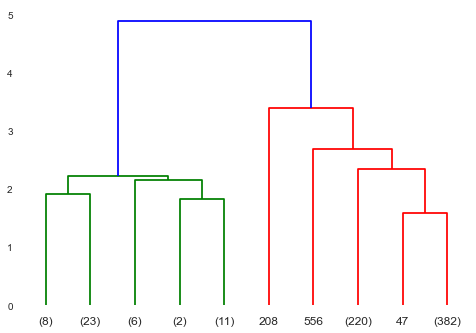

In [65]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Za,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()

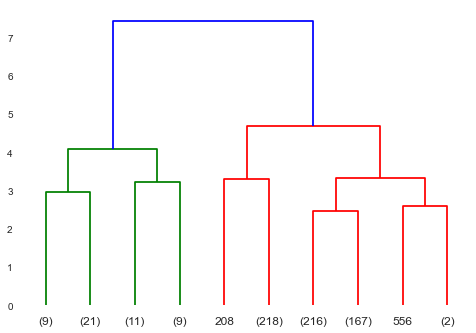

In [66]:
#  Used truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Zc,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()

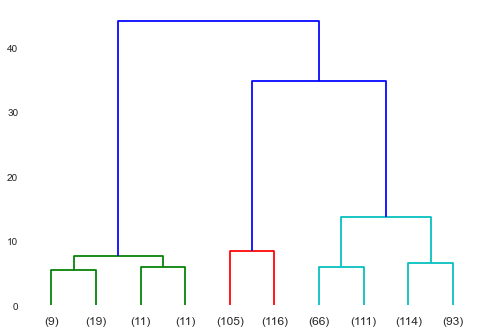

In [67]:
#  Used truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Zw,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()

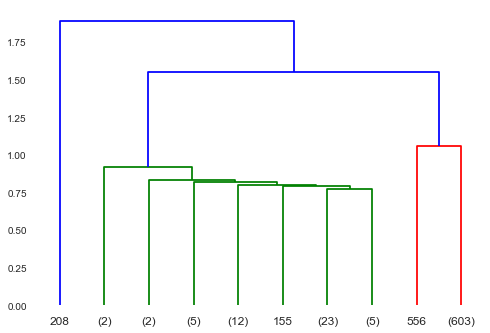

In [74]:
#  Used truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Zcn,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()

In [69]:
## Creating a copy of scaled and unscaled data for hierachical clustering
df_scaled_av =df_scaled.copy()
df_av=df.copy()

In [70]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_scaled_av)
df_av['avglabels'] = model.labels_
df_scaled_av['avglabels'] = model.labels_
print(silhouette_score(df_scaled_av, df_scaled_av['avglabels']))





0.545480260418632


In [71]:
clust_profile_hierarchy = df_av.groupby(['avglabels']).quantile(.5)
clust_profile_hierarchy ['freq4']=df_av.avglabels.value_counts().sort_index()
clust_profile_hierarchy

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
avglabels                                                            
0                   17000.0                 4.0                2.0   
1                  145500.0                 9.0                1.0   
2                   50000.0                 3.0                0.0   

           Total_visits_online  Total_calls_made  freq4  
avglabels                                                
0                          2.0               3.0    604  
1                         11.0               1.0     50  
2                         10.0               9.0      1

In [72]:
clust_profile3

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
cluster3                                                            
0                  12000.0                 2.0                1.0   
1                  31000.0                 6.0                3.0   
2                 145500.0                 9.0                1.0   

          Total_visits_online  Total_calls_made  freq3  
cluster3                                                
0                         4.0               7.0    221  
1                         1.0               2.0    384  
2                        11.0               1.0     50

In [73]:
clust_profile_hierarchy

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
avglabels                                                            
0                   17000.0                 4.0                2.0   
1                  145500.0                 9.0                1.0   
2                   50000.0                 3.0                0.0   

           Total_visits_online  Total_calls_made  freq4  
avglabels                                                
0                          2.0               3.0    604  
1                         11.0               1.0     50  
2                         10.0               9.0      1

## How many different segments of customers are there?
- I will prefer to go with three cluster 

## How are these segments different from each other?
## Kmean and Hierarchical clustering comparision with K =3 .


- In K mean clustering cluster 2 and in hierarchical clustering cluster 1 is similar
- they both show clear demarcation for high avg_credit_limit, high number of total_credit_cards and high_visit_online
- But one with low avg_credit_limit and number of cards has more call as compare to one with higher avg_credit_limit and number of cards
- Kmean has given better segregation compare to hierarchical structure for low  and moderate group

## What are your recommendations to the bank on how to better market to and service these customers?

Recommendation to Bank using K mean  K = 3 model
- One with higher avg_credit_limit and number of cards prefer online banking ,
so if the online information is provided properly than, calls and visits will reduce significantly and will reduce operation overhead.
- Spend more on online application features and promotions to make user experience even more seemless.
- From Marketing point of view also you can provide more information of new products and deals which they can look frequently as they go to online frequently.
- Cluster 1 through K mean , introduce program and bring awareness on online usage and ease at which they can do banking more efficiently and save time with highest quality and security.
- Cluster 0, analysze the nature of calls received by various and customers.Implement improvements through user awarenes programs or by coaching the bank staffs on how effectively they can address the custome concerns either though informaed dialogue or by market analysis of customer data in their region and create peronalized promotions plans or fixing any inward issue with the bank which might have cause discomfort among the customers.
- One with lower number of cards and avg_credit limit prefer to call, 
so for marketing purpose you can call them,and also you will get calls, you can do some cross sale of products along with troubleshooting.
-- From Operation point of view, if we provide infomations to new credit card holder with less number of cards 
and encourage and inform them about usage of online banking.It will help to reduce call and visits 

